# LAB 3: Introduction to classification Decision Trees

The purpuse of this lab is to provide an introduction and examples of using classification decision trees - an algorithm of which was presented in the lecture. We will use the scikit-learn library (sklearn) to build such models on the vertebrate dataset, and sonar datasets.


## Tasks

1. Study the code with explanations and examples on clasification decision trees provided in this notebook. Run each cell and check the result. 

2. The decison tree is built by using the entropy impurity (see criterion='entropy' in the code). Check numbers providing the entropy calculated in each node of the decison tree. Notice that when in a node we have 0 records in a class and all the records in the other class, the entropy is always 0, conforming what you learned in the lecture.  Then change the impurity from entropy to gini, and check again the the calculated numbers for this impurity. Review the entropy and gini impurity formulae in the last week lecture.

3. Train new decision trees with 1 level (use max_depth=1 in the code). Such trees are called decison stumps, the simplest decison trees. Try each of the 2 impurities. Does the accuracy change on the test set? Try to use a larger max_depth, what happens in the case of this small dataset, does a larger max_depth change anything on the tree?

Answer: When a decision tree with max_depth=1 (a decision stump) is trained with either impurity, the accuracy on the test set does not change. However, when the max_depth is increased, the accuracy on the test set does improve. This is because a larger max_depth allows the tree to create more branches and more nuanced decisions, leading to better accuracy. However, in this small dataset, the improvement in accuracy is not significant.

4. Repeat the above analysis with the sonar data provided as training set and test set in the same folder (see a description of the data in this notebook). Then try different values for the decision tree's hyperparameters `criterion` (for impurity) and `max_dept` for how many levels may be grown in the tree model. Which hyperparameter value combination gives you the largest accuracy on the test set? This is called manual data mining, and in the next sessions we will see a better methodology about how to improve a model, using grid search with cross validation. 

## Vertebrate Dataset

We use a variation of the vertebrate data. Each vertebrate is classified into one of 5 categories: mammals, reptiles, birds, fishes, and amphibians, based on a set of explanatory attributes (predictor variables). Except for "name", the rest of the attributes have been converted into a binary representation.  To illustrate this, we will first load the data (provided in a file at www ) into a Pandas DataFrame object and display its content.

In [1]:
import pandas as pd

data = pd.read_csv('vertebrate.csv',header='infer')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


Given the limited number of training examples, suppose we convert the problem into a binary classification task (mammals versus non-mammals). We can do so by replacing the class labels of the instances to *non-mammals* except for those that belong to the *mammals* class.

In [2]:
data['Class'] = data['Class'].replace(['fishes','birds','amphibians','reptiles'],'non-mammals')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,non-mammals
2,salmon,0,0,1,0,0,0,non-mammals
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,non-mammals
5,komodo,0,0,0,0,1,0,non-mammals
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,non-mammals
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,non-mammals


We can apply Pandas cross-tabulation to examine the relationship between the Warm-blooded and Gives Birth attributes with respect to the class. 

In [3]:
pd.crosstab([data['Warm-blooded'],data['Gives Birth']],data['Class'])

Class                     mammals  non-mammals
Warm-blooded Gives Birth                      
0            0                  0            7
             1                  0            1
1            0                  0            2
             1                  5            0

The results above show that it is possible to distinguish mammals from non-mammals using these two attributes alone since each combination of their attribute values would yield only instances that belong to the same class. For example, mammals can be identified as warm-blooded vertebrates that give birth to their young. Such a relationship can also be derived using a decision tree classifier, as shown by the example given below.

## Decision Tree Classifier

Here we apply a decision tree classifier to the vertebrate dataset described in the previous subsection. We use sklearn library to train/ learn the tree. 

In [4]:
from sklearn import tree

Y = data['Class']
X = data.drop(['Name','Class'],axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=2)
clf = clf.fit(X, Y)

[Text(0.4, 0.8333333333333334, 'X[1] <= 0.5\nentropy = 0.918\nsamples = 15\nvalue = [5, 10]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.6, 0.5, 'X[0] <= 0.5\nentropy = 0.65\nsamples = 6\nvalue = [5, 1]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]')]

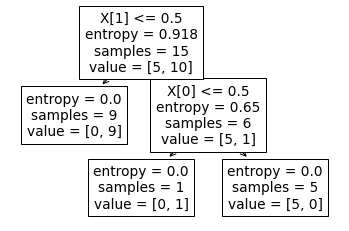

In [5]:
tree.plot_tree(clf)

The preceding commands will extract the predictor (X) and target class (Y) attributes from the vertebrate dataset and create a decision tree classifier object using entropy as its impurity measure for splitting criterion. The decision tree class in Python sklearn library also supports using 'gini' as impurity measure. The classifier above is also constrained to generate trees with a maximum depth equals to 2. Next, the classifier is trained on the labeled data using the fit() function. 

We can plot the resulting decision tree obtained after training the classifier. To do this, you must first install both graphviz (http://www.graphviz.org) and its Python interface called pydotplus (http://pydotplus.readthedocs.io/).

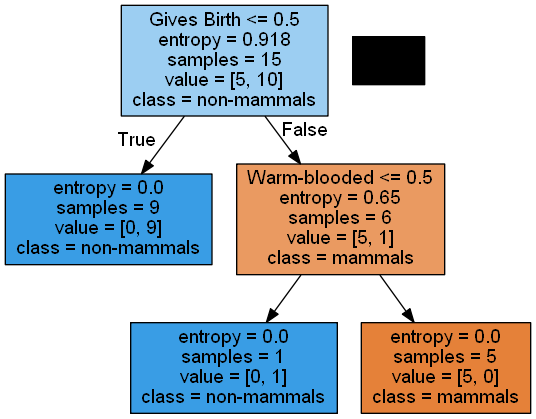

In [6]:
import pydotplus 
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['mammals','non-mammals'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

Next, suppose we apply the decision tree to classify the following test examples.

In [7]:
testData = [['gila monster',0,0,0,0,1,1,'non-mammals'],
           ['platypus',1,0,0,0,1,1,'mammals'],
           ['owl',1,0,0,1,1,0,'non-mammals'],
           ['dolphin',1,1,1,0,0,0,'mammals']]
testData = pd.DataFrame(testData, columns=data.columns)
testData

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,gila monster,0,0,0,0,1,1,non-mammals
1,platypus,1,0,0,0,1,1,mammals
2,owl,1,0,0,1,1,0,non-mammals
3,dolphin,1,1,1,0,0,0,mammals


We first extract the predictor and target class attributes from the test data and then apply the decision tree classifier to predict their classes.

In [8]:
testY = testData['Class']
testX = testData.drop(['Name','Class'],axis=1)

predY = clf.predict(testX)
predictions = pd.concat([testData['Name'],pd.Series(predY,name='Predicted Class')], axis=1)
predictions

,Name,Predicted Class
0,gila monster,non-mammals
1,platypus,non-mammals
2,owl,non-mammals
3,dolphin,mammals


Except for platypus, which is an egg-laying mammal, the classifier correctly predicts the class label of the test examples. We can calculate the accuracy of the classifier on the test data as shown by the example given below.

In [9]:
from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 0.75


## Sonar Data
This data contains 111 patterns obtained by bouncing sonar signals off a metal cylinder at various angles and under various conditions, and 97 patterns obtained from rocks under similar conditions. The transmitted sonar signal is a frequency-modulated chirp, rising in frequency. The data contains signals obtained from a variety of different aspect angles, spanning 90 degrees for the cylinder and 180 degrees for the rock. Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time. The label associated with each record contains, in the last column, the letter "R" if the object is a rock and "M" if it is a mine (metal cylinder).


In [10]:
# read sonar_train.csv and sonar_test.csv, and perform the same kind of analysis (as per Task 4)
# ....